In [2]:
#Importando as bibliotecas necessárias e carregando a base de dados

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

In [3]:
dataset = pd.read_csv("../data/data.csv")
dataset

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


In [4]:
#Tratamento de dados

dataset.drop(["address"], axis=1, inplace=True)
dataset

,district,area,bedrooms,garage,type,rent,total
0,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Pinheiros,18,1,0,Apartamento,4000,4661
3,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...
11652,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


In [5]:
dataset.columns = ["Distrito", "Área (m2)", "N° de Quartos", 
                   "N° de Garagens", "Tipo", "Aluguel (R$)", "Custo Total (R$)"]
dataset

,Distrito,Área (m2),N° de Quartos,N° de Garagens,Tipo,Aluguel (R$),Custo Total (R$)
0,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Pinheiros,18,1,0,Apartamento,4000,4661
3,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...
11652,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Distrito          11657 non-null  object
 1   Área (m2)         11657 non-null  int64 
 2   N° de Quartos     11657 non-null  int64 
 3   N° de Garagens    11657 non-null  int64 
 4   Tipo              11657 non-null  object
 5   Aluguel (R$)      11657 non-null  int64 
 6   Custo Total (R$)  11657 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 637.6+ KB


In [7]:
colunas_categoricas = [column for column in dataset.columns if dataset[column].dtype == "object"]

for coluna in colunas_categoricas:
    print(f"{coluna}:\n {dataset[coluna].value_counts().sort_index()}\n")

Distrito:
 Aclimação                                                 50
Adalgisa                                                   4
Agua Branca                                                1
Alphaville                                                24
Alphaville Centro Industrial E Empresarial/alphaville.     5
                                                          ..
Várzea da Barra Funda                                     11
Água Branca                                               44
Água Fria                                                 20
Água Funda                                                 1
Água Rasa                                                 19
Name: Distrito, Length: 1199, dtype: int64

Tipo:
 Apartamento           7194
Casa                  2841
Casa em condomínio     241
Studio e kitnet       1381
Name: Tipo, dtype: int64



In [8]:
dataset.replace({"Distrito": "Alphaville Centro Industrial E Empresarial/alphaville.",
                 "Distrito": ["á", "é", "í", "ó", "ú", "Á", "É", "Í", "Ó", "Ú",
                              "ã", "õ", "Ã", "Õ",
                              "â", "ê", "ô", "Â", "Ê", "Ô"]},
                {"Distrito": "Alphaville",
                 "Distrito": ["a", "e", "i", "o", "u", "A", "E", "I", "O", "U",
                              "a", "o", "A", "O",
                              "a", "e", "o", "A", "E", "O"]},
                 inplace=True,
                 regex=True)

dataset["Distrito"].value_counts().sort_index()

Aclimaçao             50
Adalgisa               4
Agua Branca           45
Agua Fria             20
Agua Funda             1
                      ..
Vila das Palmeiras     1
Vila do Bosque         2
Vila do Castelo        8
Vila do Encontro      13
Vila dos Andrades      1
Name: Distrito, Length: 1111, dtype: int64

In [9]:
dataset.drop(dataset[(dataset["Área (m2)"] == 0) | 
                     (dataset["Aluguel (R$)"] == 0) | 
                     (dataset["Custo Total (R$)"] == 0)].index, inplace=True)

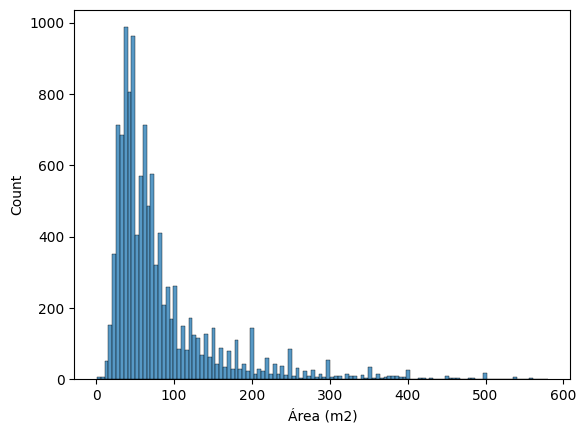

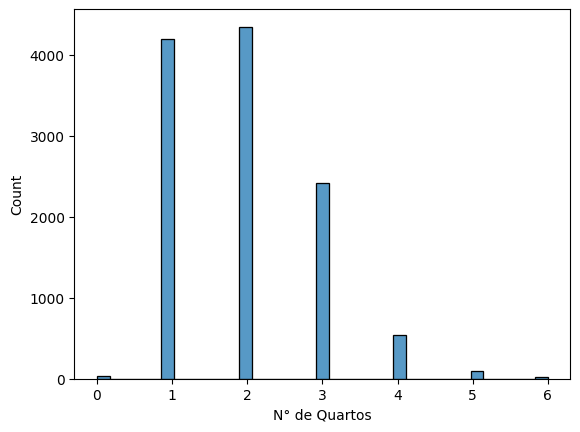

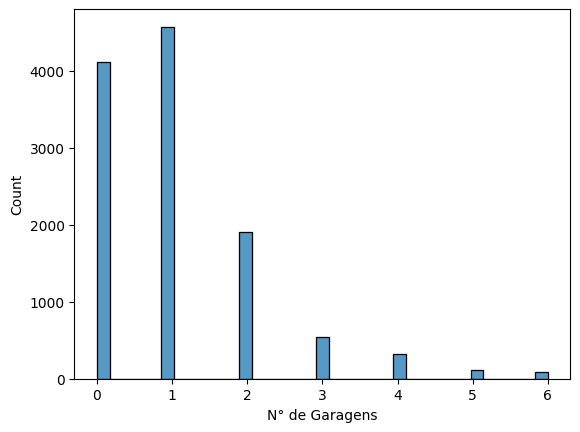

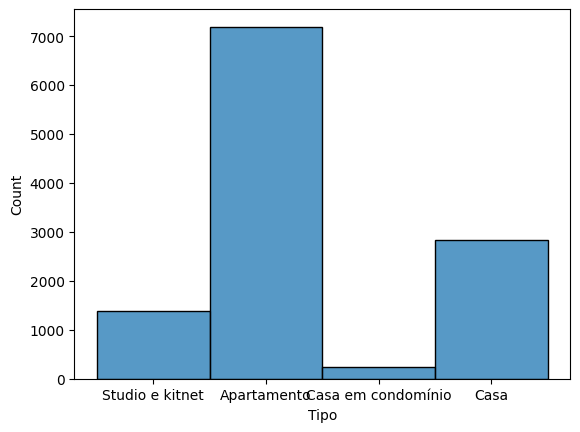

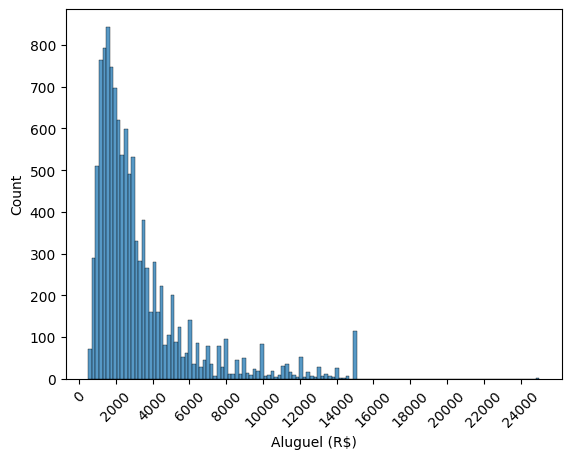

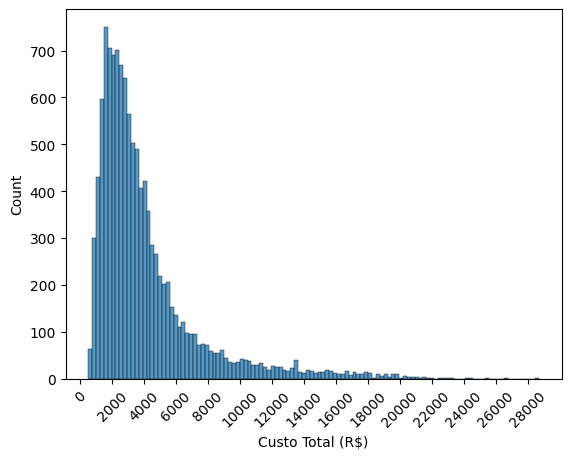

In [10]:
#Análise Exploratória dos Dados (EDA)

for column in dataset.columns:
    if column in ["Aluguel (R$)", "Custo Total (R$)"]:
        sns.histplot(data=dataset[column])
        plt.xticks(range(0, max(dataset[column]), 2000), rotation=45)
        plt.show()

    elif column != "Distrito":
        sns.histplot(data=dataset[column])
        plt.show()

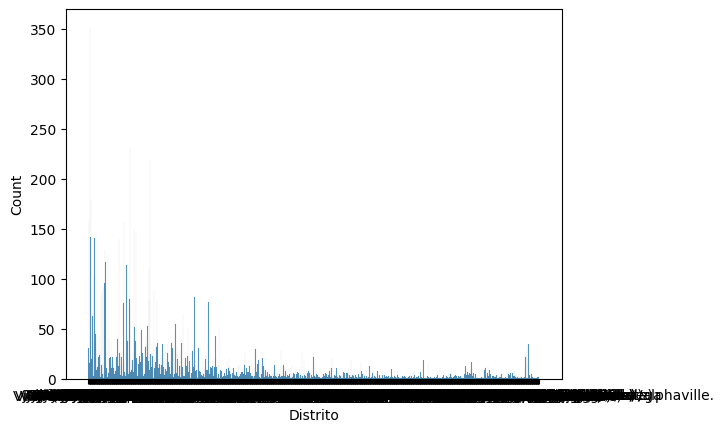

In [11]:
sns.histplot(data=dataset["Distrito"])
plt.show()

In [12]:
distrito_numero_dict = dict()
for i in enumerate(dataset["Distrito"].unique()):
    distrito_numero_dict[i[1]] = i[0]

dict(list(distrito_numero_dict.items())[:51])

{'Belenzinho': 0,
 'Vila Marieta': 1,
 'Pinheiros': 2,
 'Vila Re': 3,
 'Bela Vista': 4,
 'Bras': 5,
 'Brooklin Paulista': 6,
 'Centro': 7,
 'Piqueri': 8,
 'Vila Aricanduva': 9,
 'Se': 10,
 'Tatuape': 11,
 'Lauzane Paulista': 12,
 'Jardim Paraventi': 13,
 'Cambuci': 14,
 'Liberdade': 15,
 'Cidade Monçoes': 16,
 'Agua Branca': 17,
 'Mooca': 18,
 'Chacara Inglesa': 19,
 'Vila Moreira': 20,
 'Gopouva': 21,
 'Jardim Sao Saverio': 22,
 'Vila Amalia (zona Norte)': 23,
 'Saude': 24,
 'Quarta Parada': 25,
 'Santa Efigenia': 26,
 'Paraiso do Morumbi': 27,
 'Chora Menino': 28,
 'Vila Medeiros': 29,
 'Vila Guarani(zona Leste)': 30,
 'Barra Funda': 31,
 'Vila Augusta': 32,
 'Vila Olimpia': 33,
 'Vila Celeste': 34,
 'Jardim Independencia': 35,
 'Vila Buarque': 36,
 'Vila Vivaldi': 37,
 'Vila Brasilio Machado': 38,
 'Vila Carlos de Campos': 39,
 'Vila Prudente': 40,
 'Vila Andrade': 41,
 'Campos Eliseos': 42,
 'Vila Nivi': 43,
 'Vila Palmeiras': 44,
 'Ponte Grande': 45,
 'Vila Marina': 46,
 'Jardim P

In [13]:
dataset["Distrito Número"] = [distrito_numero_dict[distrito] for distrito in dataset["Distrito"]]
dataset

,Distrito,Área (m2),N° de Quartos,N° de Garagens,Tipo,Aluguel (R$),Custo Total (R$),Distrito Número
0,Belenzinho,21,1,0,Studio e kitnet,2400,2939,0
1,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,1
2,Pinheiros,18,1,0,Apartamento,4000,4661,2
3,Vila Re,56,2,2,Casa em condomínio,1750,1954,3
4,Bela Vista,19,1,0,Studio e kitnet,4000,4654,4
...,...,...,...,...,...,...,...,...
11652,Santo Amaro,94,2,1,Apartamento,4100,5778,117
11653,Jardim Vitoria Regia,350,4,4,Apartamento,11250,17480,414
11654,Jardim Caravelas,84,1,2,Apartamento,4500,5467,311
11655,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200,642


In [14]:
print(f"Distrito:\n{dataset['Distrito'].value_counts()}\n\n", f"Código:\n{dataset['Distrito Número'].value_counts()}")

Distrito:
Bela Vista                 352
Vila Mariana               232
Jardim Paulista            220
Centro                     178
Pinheiros                  159
                          ... 
Jardim Santa Efigenia        1
Vila Maricy                  1
Vila Gabriel                 1
Vila Guarani (Zona Sul)      1
Retiro Morumbi               1
Name: Distrito, Length: 1111, dtype: int64

 Código:
4       352
102     232
152     220
7       178
2       159
       ... 
786       1
785       1
784       1
783       1
1110      1
Name: Distrito Número, Length: 1111, dtype: int64


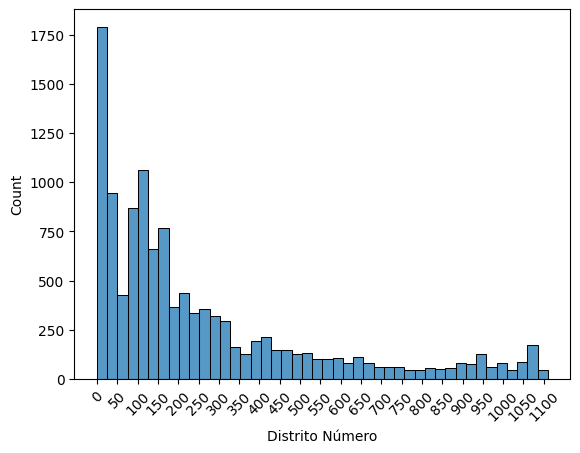

In [15]:
sns.histplot(data=dataset["Distrito Número"])
plt.xticks(range(0, max(dataset["Distrito Número"]), 50), rotation=45)
plt.show()

In [16]:
warnings.simplefilter(action='ignore', category=FutureWarning)

q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)

diferenca_interquartil = q3 - q1

cerca_inferior = q1 - (1.5 * diferenca_interquartil)
cerca_superior = q3 + (1.5 * diferenca_interquartil)

print(f"Cerca Inferior:\n{cerca_inferior}\n\n", f"Cerca Superior:\n{cerca_superior}")

Cerca Inferior:
Área (m2)            -44.00
N° de Quartos         -2.00
N° de Garagens        -3.00
Aluguel (R$)       -1725.00
Custo Total (R$)   -2171.75
Distrito Número     -371.50
dtype: float64

 Cerca Superior:
Área (m2)            180.00
N° de Quartos          6.00
N° de Garagens         5.00
Aluguel (R$)        7115.00
Custo Total (R$)    8942.25
Distrito Número      776.50
dtype: float64


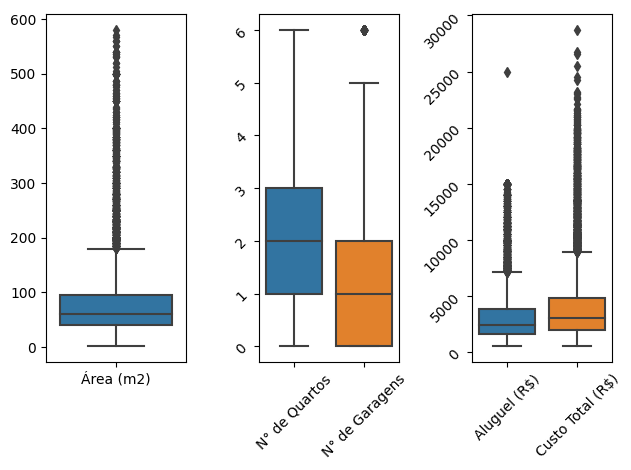

In [17]:
fig, axes = plt.subplots(1, 3)

ax0 = sns.boxplot(data=dataset[["Área (m2)"]], ax=axes[0])
ax1 = sns.boxplot(data=dataset[["N° de Quartos", "N° de Garagens"]], ax=axes[1])
ax2 = sns.boxplot(data=dataset[["Aluguel (R$)", "Custo Total (R$)"]], ax=axes[2])

ax1.tick_params(rotation=45)
ax2.tick_params(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#Objetivos:
#Quais tipos de domicílio possuem as maiores despesas, além do aluguel?
#Quais distritos possuem os aluguéis mais caros e mais baratos?
#Váriaveis como área, número de quartos e garagens influenciam o valor do aluguel?
#Quais distritos possuem os melhores e piores custos-benefícios, por tipo de domicílio?

In [19]:
#Quais tipos de domicílio possuem as maiores despesas, além do aluguel?

df_aluguel_sem_outliers = dataset[dataset["Aluguel (R$)"] <= cerca_superior["Aluguel (R$)"]]

df_aluguel_e_custo_sem_outliers = df_aluguel_sem_outliers[df_aluguel_sem_outliers["Custo Total (R$)"] 
                                                          <= cerca_superior["Custo Total (R$)"]]

df_aluguel_e_custo_sem_outliers

,Distrito,Área (m2),N° de Quartos,N° de Garagens,Tipo,Aluguel (R$),Custo Total (R$),Distrito Número
0,Belenzinho,21,1,0,Studio e kitnet,2400,2939,0
1,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,1
2,Pinheiros,18,1,0,Apartamento,4000,4661,2
3,Vila Re,56,2,2,Casa em condomínio,1750,1954,3
4,Bela Vista,19,1,0,Studio e kitnet,4000,4654,4
...,...,...,...,...,...,...,...,...
11646,Santo Amaro,180,4,2,Casa,4700,5264,117
11651,Alto da Boa Vista,158,4,2,Apartamento,6500,8929,613
11652,Santo Amaro,94,2,1,Apartamento,4100,5778,117
11654,Jardim Caravelas,84,1,2,Apartamento,4500,5467,311


In [20]:
media_aluguel_e_custo_por_tipo = round(df_aluguel_e_custo_sem_outliers.groupby(by="Tipo")[["Aluguel (R$)", 
                                                                                     "Custo Total (R$)"]].mean(), 2)
media_aluguel_e_custo_por_tipo

,Aluguel (R$),Custo Total (R$)
Tipo,,
Apartamento,2648.19,3495.37
Casa,2683.65,2928.23
Casa em condomínio,2226.62,2550.85
Studio e kitnet,2080.08,2614.79


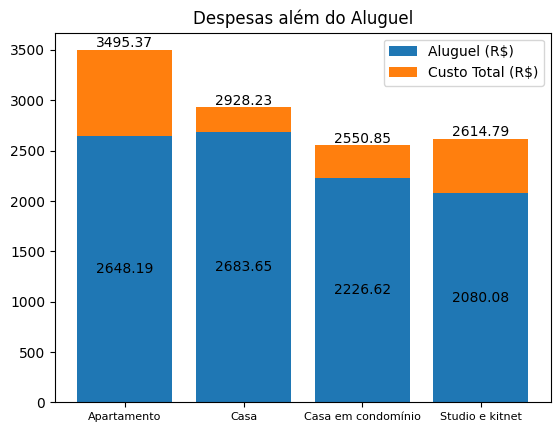

In [21]:
aluguel = plt.bar(x=media_aluguel_e_custo_por_tipo.index,
        height=media_aluguel_e_custo_por_tipo["Aluguel (R$)"].values,
        label="Aluguel (R$)",
        zorder=2)

custo_total = plt.bar(x=media_aluguel_e_custo_por_tipo.index,
        height=media_aluguel_e_custo_por_tipo["Custo Total (R$)"].values,
        label="Custo Total (R$)",
        zorder=1)

plt.bar_label(aluguel, labels=media_aluguel_e_custo_por_tipo["Aluguel (R$)"].values, label_type='center')
plt.bar_label(custo_total, labels=media_aluguel_e_custo_por_tipo["Custo Total (R$)"].values, label_type='edge')

plt.title("Despesas além do Aluguel")
plt.xticks(fontsize=8)
plt.legend()
plt.show()

In [22]:
#Quais distritos possuem os aluguéis mais caros e mais baratos?

df_aluguel_sem_outliers

,Distrito,Área (m2),N° de Quartos,N° de Garagens,Tipo,Aluguel (R$),Custo Total (R$),Distrito Número
0,Belenzinho,21,1,0,Studio e kitnet,2400,2939,0
1,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,1
2,Pinheiros,18,1,0,Apartamento,4000,4661,2
3,Vila Re,56,2,2,Casa em condomínio,1750,1954,3
4,Bela Vista,19,1,0,Studio e kitnet,4000,4654,4
...,...,...,...,...,...,...,...,...
11646,Santo Amaro,180,4,2,Casa,4700,5264,117
11651,Alto da Boa Vista,158,4,2,Apartamento,6500,8929,613
11652,Santo Amaro,94,2,1,Apartamento,4100,5778,117
11654,Jardim Caravelas,84,1,2,Apartamento,4500,5467,311


In [23]:
media_aluguel_por_distrito = round(df_aluguel_sem_outliers.groupby(by="Distrito")["Aluguel (R$)"].mean(), 2)
media_aluguel_por_distrito

Distrito
Aclimaçao             2652.31
Adalgisa              6015.00
Agua Branca           3121.78
Agua Fria             2913.11
Agua Funda            3000.00
                       ...   
Vila das Palmeiras    2200.00
Vila do Bosque        4380.00
Vila do Castelo       1951.62
Vila do Encontro      1525.46
Vila dos Andrades     1300.00
Name: Aluguel (R$), Length: 1091, dtype: float64

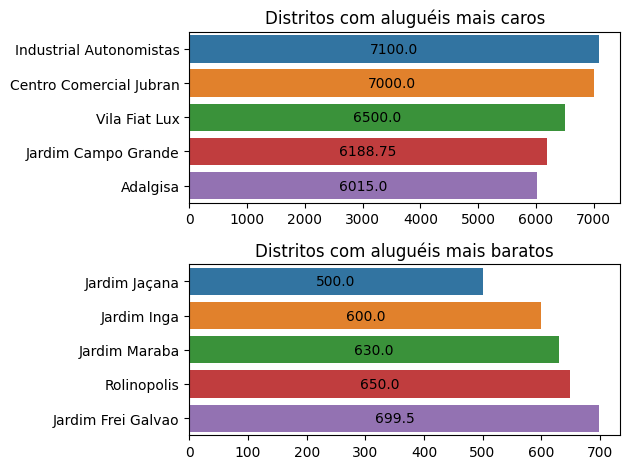

In [24]:
fig, axes = plt.subplots(2, 1)

ax0 = sns.barplot(y=media_aluguel_por_distrito.sort_values(ascending=False)[:5].index,
                x=media_aluguel_por_distrito.sort_values(ascending=False)[:5].values,
                orient='h',
                ax=axes[0])

ax1 = sns.barplot(y=media_aluguel_por_distrito.sort_values(ascending=True)[:5].index,
                x=media_aluguel_por_distrito.sort_values(ascending=True)[:5].values,
                orient='h',
                ax=axes[1])

for bars0, bars1 in zip(ax0.containers, ax1.containers):
    ax0.bar_label(bars0, media_aluguel_por_distrito.sort_values(ascending=False)[:5].values,
                  label_type='center')
    ax1.bar_label(bars1, media_aluguel_por_distrito.sort_values(ascending=True)[:5].values,
                  label_type='center')
    
ax0.set_title("Distritos com aluguéis mais caros")
ax1.set_title("Distritos com aluguéis mais baratos")
ax0.set(ylabel='')
ax1.set(ylabel='')
plt.tight_layout()
plt.show()

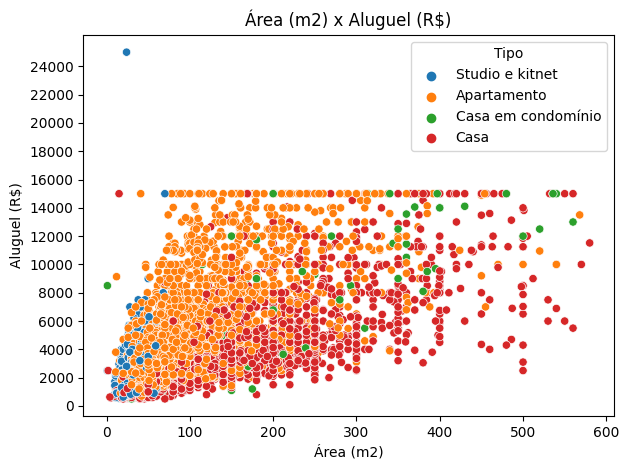

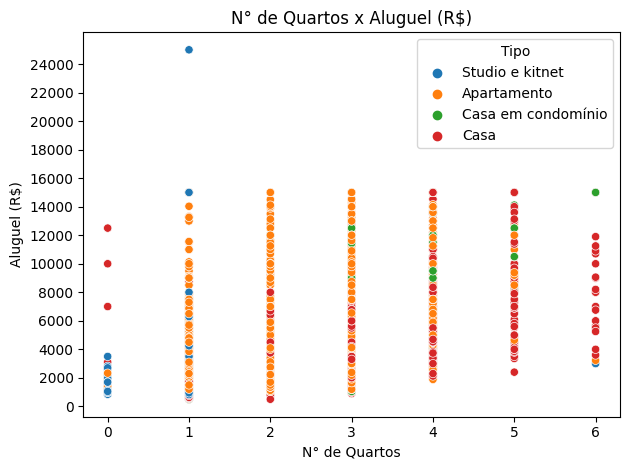

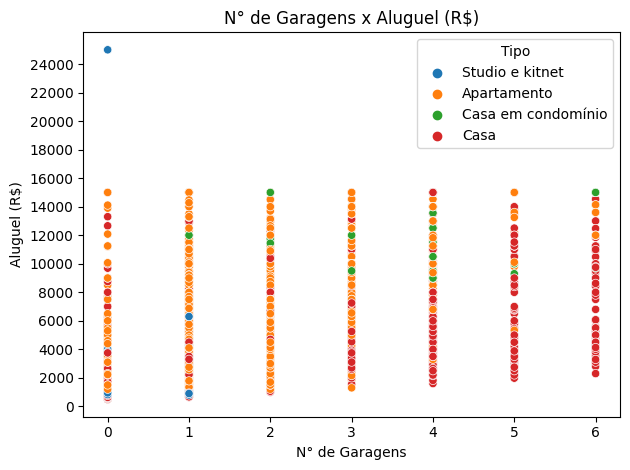

In [25]:
#Váriaveis como área, número de quartos e garagens influenciam o valor do aluguel e do custo total?

for column in ["Área (m2)", "N° de Quartos", "N° de Garagens"]:
    ax0 = sns.scatterplot(x=dataset[column], y=dataset["Aluguel (R$)"], hue=dataset["Tipo"])
    ax0.set_yticks(range(0, max(dataset["Aluguel (R$)"]), 2000))

    ax0.set_title(f"{column} x Aluguel (R$)")
    plt.tight_layout()
    plt.show()

In [26]:
#Quais distritos possuem os melhores e piores custos-benefícios, por tipo de domicílio?

df_aluguel_e_area_sem_outliers = df_aluguel_sem_outliers[df_aluguel_sem_outliers["Área (m2)"] <= cerca_superior["Área (m2)"]]
df_aluguel_e_area_sem_outliers

,Distrito,Área (m2),N° de Quartos,N° de Garagens,Tipo,Aluguel (R$),Custo Total (R$),Distrito Número
0,Belenzinho,21,1,0,Studio e kitnet,2400,2939,0
1,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,1
2,Pinheiros,18,1,0,Apartamento,4000,4661,2
3,Vila Re,56,2,2,Casa em condomínio,1750,1954,3
4,Bela Vista,19,1,0,Studio e kitnet,4000,4654,4
...,...,...,...,...,...,...,...,...
11646,Santo Amaro,180,4,2,Casa,4700,5264,117
11651,Alto da Boa Vista,158,4,2,Apartamento,6500,8929,613
11652,Santo Amaro,94,2,1,Apartamento,4100,5778,117
11654,Jardim Caravelas,84,1,2,Apartamento,4500,5467,311


In [27]:
media_area_aluguel_por_distrito_tipo = round(df_aluguel_e_area_sem_outliers.groupby(by=["Distrito", 
                                                                                  "Tipo"])[["Área (m2)", "Aluguel (R$)"]].mean(), 2)

media_area_aluguel_por_distrito_tipo

Área (m2)  Aluguel (R$)
Distrito          Tipo                                       
Aclimaçao         Apartamento             60.90       2480.38
                  Casa                    92.40       2720.20
                  Studio e kitnet         27.00       1158.50
Adalgisa          Apartamento            109.00       7000.00
Agua Branca       Apartamento             57.18       3123.42
...                                         ...           ...
Vila do Castelo   Casa                    40.00        935.00
                  Casa em condomínio     130.00       2076.00
Vila do Encontro  Apartamento             53.75       1632.50
                  Casa                    69.00       1354.20
Vila dos Andrades Casa em condomínio      70.00       1300.00

[1893 rows x 2 columns]

In [28]:
media_area_aluguel_por_distrito_tipo.reset_index(inplace=True)
media_area_aluguel_por_distrito_tipo

,Distrito,Tipo,Área (m2),Aluguel (R$)
0,Aclimaçao,Apartamento,60.90,2480.38
1,Aclimaçao,Casa,92.40,2720.20
2,Aclimaçao,Studio e kitnet,27.00,1158.50
3,Adalgisa,Apartamento,109.00,7000.00
4,Agua Branca,Apartamento,57.18,3123.42
...,...,...,...,...
1888,Vila do Castelo,Casa,40.00,935.00
1889,Vila do Castelo,Casa em condomínio,130.00,2076.00
1890,Vila do Encontro,Apartamento,53.75,1632.50
1891,Vila do Encontro,Casa,69.00,1354.20


In [29]:
media_area_aluguel_por_distrito_tipo["Valor/m2 (R$)"] = round(media_area_aluguel_por_distrito_tipo["Aluguel (R$)"] / media_area_aluguel_por_distrito_tipo["Área (m2)"], 2)
media_area_aluguel_por_distrito_tipo

,Distrito,Tipo,Área (m2),Aluguel (R$),Valor/m2 (R$)
0,Aclimaçao,Apartamento,60.90,2480.38,40.73
1,Aclimaçao,Casa,92.40,2720.20,29.44
2,Aclimaçao,Studio e kitnet,27.00,1158.50,42.91
3,Adalgisa,Apartamento,109.00,7000.00,64.22
4,Agua Branca,Apartamento,57.18,3123.42,54.62
...,...,...,...,...,...
1888,Vila do Castelo,Casa,40.00,935.00,23.38
1889,Vila do Castelo,Casa em condomínio,130.00,2076.00,15.97
1890,Vila do Encontro,Apartamento,53.75,1632.50,30.37
1891,Vila do Encontro,Casa,69.00,1354.20,19.63


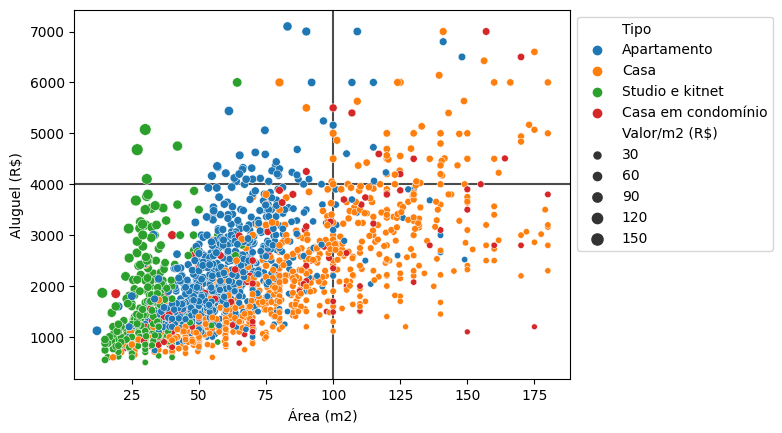

In [30]:
scatter = sns.scatterplot(x=media_area_aluguel_por_distrito_tipo["Área (m2)"],
                y=media_area_aluguel_por_distrito_tipo["Aluguel (R$)"],
                hue=media_area_aluguel_por_distrito_tipo["Tipo"],
                size=media_area_aluguel_por_distrito_tipo["Valor/m2 (R$)"],
                zorder=1)

sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))
scatter.axes.axhline(y=4000, color="black", alpha=0.7, zorder=0)
scatter.axes.axvline(x=100, color="black", alpha=0.7, zorder=0)
plt.show()

In [31]:
vm2_studio_kitnet = media_area_aluguel_por_distrito_tipo[media_area_aluguel_por_distrito_tipo["Tipo"] == "Studio e kitnet"]

vm2_apartamento = media_area_aluguel_por_distrito_tipo[media_area_aluguel_por_distrito_tipo["Tipo"] == "Apartamento"]

vm2_casa_condominio = media_area_aluguel_por_distrito_tipo[media_area_aluguel_por_distrito_tipo["Tipo"] == "Casa em condomínio"]

vm2_casa = media_area_aluguel_por_distrito_tipo[media_area_aluguel_por_distrito_tipo["Tipo"] == "Casa"]

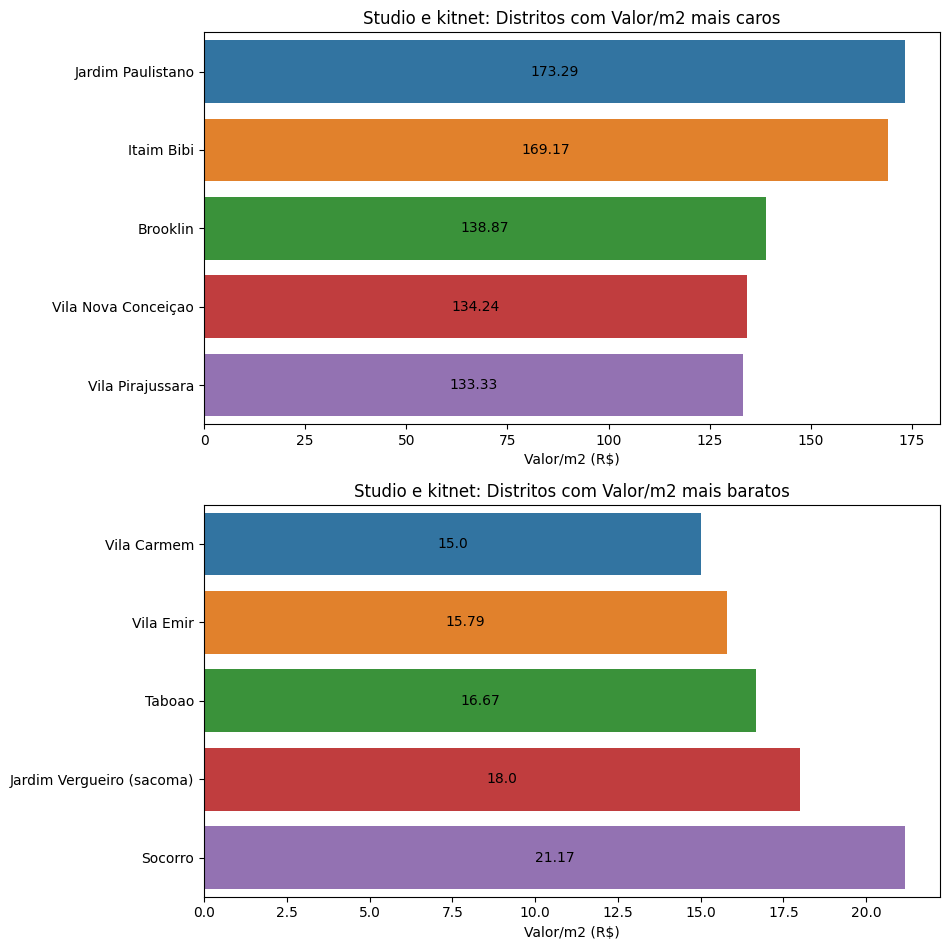

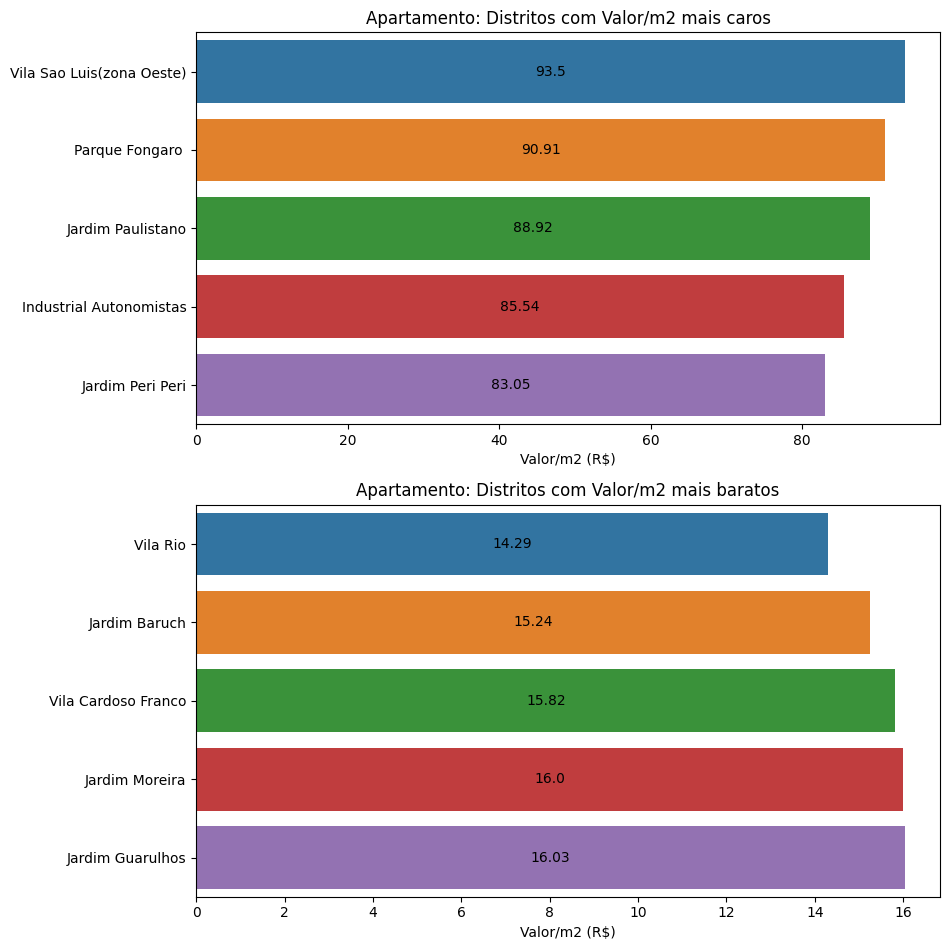

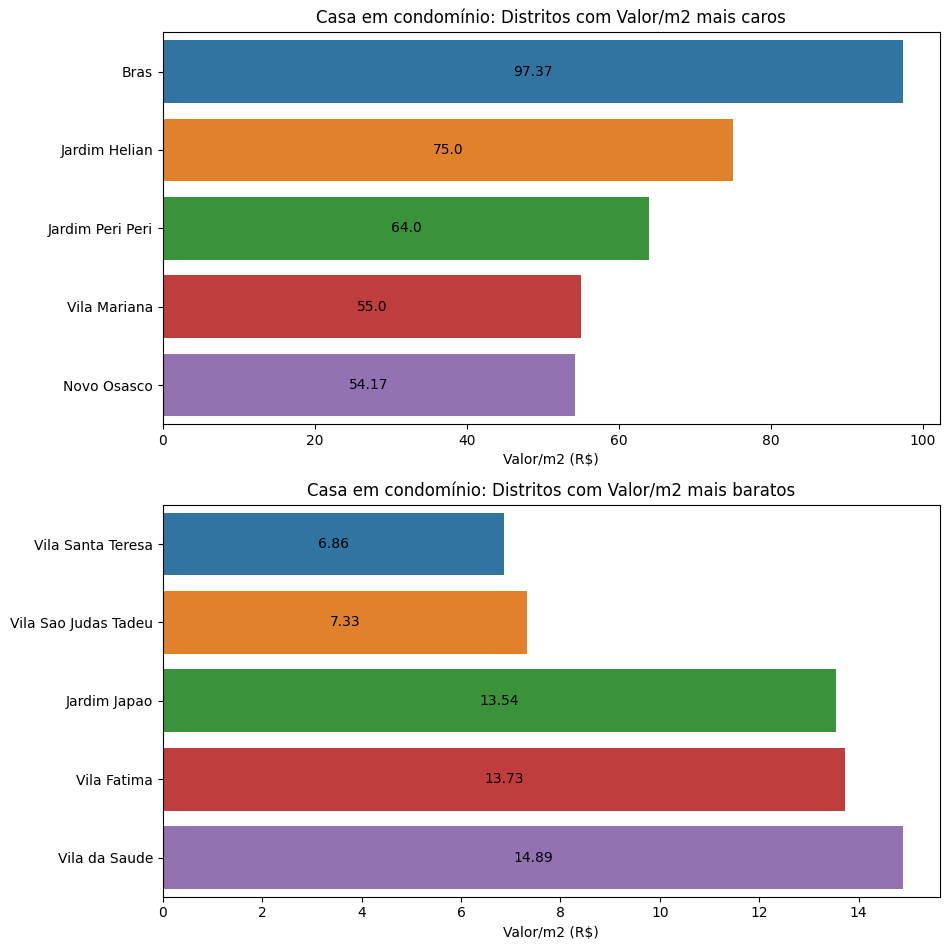

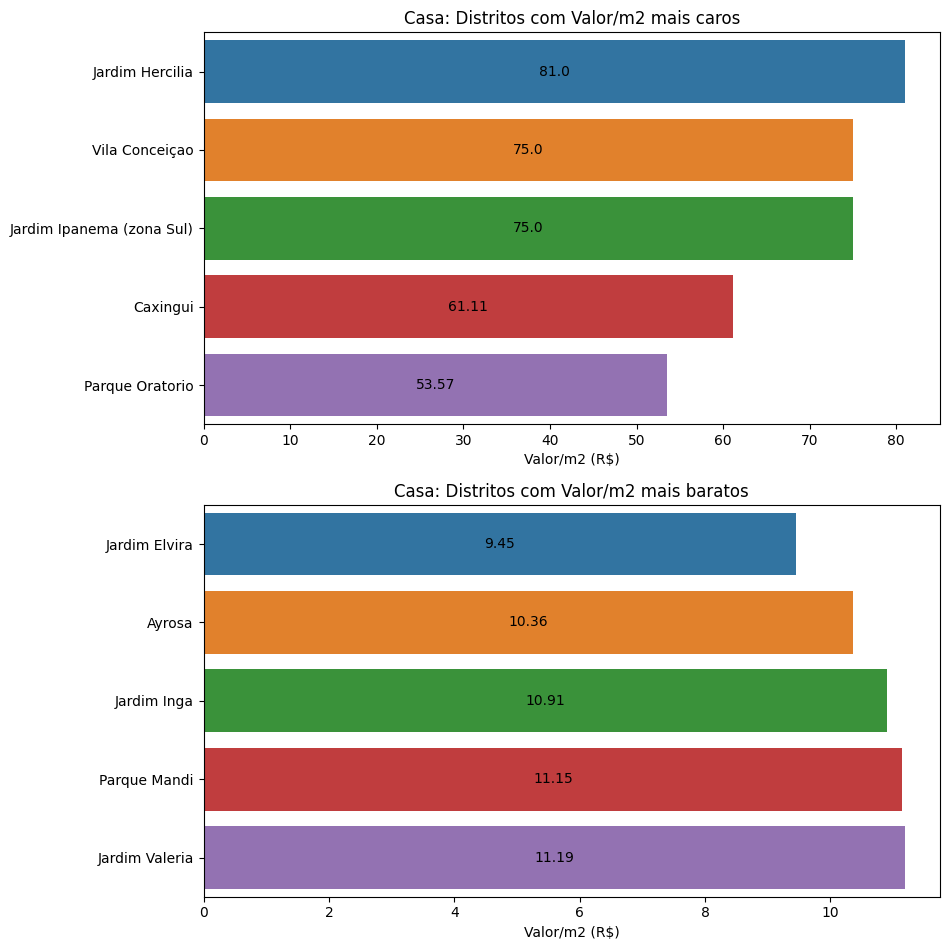

In [32]:
for df in [vm2_studio_kitnet, vm2_apartamento, vm2_casa_condominio, vm2_casa]:

    fig, axes = plt.subplots(2, 1)
    fig.set_size_inches(9.6, 9.6)

    ax0 = sns.barplot(y=df.sort_values(by="Valor/m2 (R$)", ascending=False)["Distrito"][:5],
                    x=df.sort_values(by="Valor/m2 (R$)", ascending=False)["Valor/m2 (R$)"][:5],
                    orient='h',
                    ax=axes[0])

    ax1 = sns.barplot(y=df.sort_values(by="Valor/m2 (R$)", ascending=True)["Distrito"][:5],
                    x=df.sort_values(by="Valor/m2 (R$)", ascending=True)["Valor/m2 (R$)"][:5],
                    orient='h',
                    ax=axes[1])

    for bars0, bars1 in zip(ax0.containers, ax1.containers):
        ax0.bar_label(bars0, df["Valor/m2 (R$)"].sort_values(ascending=False)[:5].values,
                    label_type='center')
        ax1.bar_label(bars1, df["Valor/m2 (R$)"].sort_values(ascending=True)[:5].values,
                    label_type='center')

    ax0.set_title(f"{df['Tipo'].unique()[0]}: Distritos com Valor/m2 mais caros")
    ax1.set_title(f"{df['Tipo'].unique()[0]}: Distritos com Valor/m2 mais baratos")
    ax0.set(ylabel='')
    ax1.set(ylabel='')
    plt.tight_layout()
    plt.show()